#### Machine Learning Zoomcamp
### Homework Solution
## Module-02 : Machine Learning for Regression

In [1]:
data = 'https://raw.githubusercontent.com/alexeygrigorev/datasets/master/laptops.csv'

In [2]:
!rm -f /home/hduser/ml-zoomcamp/dataset/laptops.csv && wget -P /home/hduser/ml-zoomcamp/dataset $data

--2024-10-09 16:08:35--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/laptops.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 298573 (292K) [text/plain]
Saving to: ‘/home/hduser/ml-zoomcamp/dataset/laptops.csv’

laptops.csv         100%[===================>] 291.58K   158KB/s    in 1.8s    

2024-10-09 16:08:39 (158 KB/s) - ‘/home/hduser/ml-zoomcamp/dataset/laptops.csv’ saved [298573/298573]



In [3]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv('../../dataset/laptops.csv')

In [5]:
len(df)

2160

In [6]:
df.head()

,Laptop,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen,Touch,Final Price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01


In [7]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [8]:
df.dtypes

laptop           object
status           object
brand            object
model            object
cpu              object
ram               int64
storage           int64
storage_type     object
gpu              object
screen          float64
touch            object
final_price     float64
dtype: object

In [9]:
df4 = df[['ram', 'storage', 'screen', 'final_price']]
df4.head()

,ram,storage,screen,final_price
0,8,512,15.6,1009.00
1,8,256,15.6,299.00
2,8,256,15.6,789.00
3,16,1000,15.6,1199.00
4,16,512,15.6,669.01


## Exploratory data analysis (EDA)

In [10]:
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

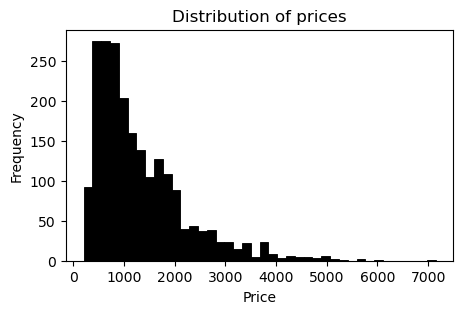

In [11]:
plt.figure(figsize=(5, 3))

sns.histplot(df4.final_price, bins=40, color='black', alpha=1)
plt.ylabel('Frequency')
plt.xlabel('Price')
plt.title('Distribution of prices')

plt.show()

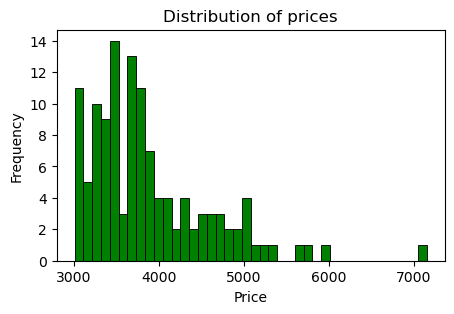

In [12]:
plt.figure(figsize=(5, 3))

sns.histplot(df4.final_price[df4.final_price > 3000], bins=40, color='green', alpha=1)
plt.ylabel('Frequency')
plt.xlabel('Price')
plt.title('Distribution of prices')

plt.show()

## Question 1

There's one column with missing values. What is it?

- 'ram'
- 'storage'
- 'screen'
- 'final_price'

In [13]:
df4.isnull().sum()

ram            0
storage        0
screen         4
final_price    0
dtype: int64

In [14]:
missing_values = df4.isnull().sum()
missing_columns = missing_values[missing_values > 0].index
print(missing_columns)

Index(['screen'], dtype='object')


### *Answer 1 : screen*

## Question 2

What's the median (50% percentile) for variable 'ram'?

- 8
- 16
- 24
- 32

In [15]:
median_ram = df4['ram'].median()
print(median_ram)

16.0


### *Answer 2 : 16*

## Question 3

- We need to deal with missing values for the column from Q1.
- We have two options: fill it with 0 or with the mean of this variable.
- Try both options. For each, train a linear regression model without regularization using the code from the lessons.
- For computing the mean, use the training only!
- Use the validation dataset to evaluate the models and compare the RMSE of each option.
- Round the RMSE scores to 2 decimal digits using round(score, 2)
- Which option gives better RMSE?

Options:

- With 0
- With mean
- Both are equally good

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import root_mean_squared_error

# Step 1: Shuffle and split the dataset
df_shuffled = df4.sample(frac=1, random_state=42)  # Shuffle the dataset with seed 42 for reproducibility
train_val, test = train_test_split(df_shuffled, test_size=0.2, random_state=42)  # Split: 20% for testing
train, val = train_test_split(train_val, test_size=0.25, random_state=42)  # 0.25 of train_val = 20% of total data

# Defining X (features) and y (target) for each set
X_train = train.drop(columns='final_price')  # Features for the training set
y_train = train['final_price']  # Target for the training set
X_val = val.drop(columns='final_price')  # Features for the validation set
y_val = val['final_price']  # Target for the validation set
X_test = test.drop(columns='final_price')  # Features for the test set
y_test = test['final_price']  # Target for the test set

# ----------------------------------------------------
# Step 2: Handle missing values in the 'screen' column
# ----------------------------------------------------
# Option 1: Fill missing values with 0
X_train_0 = X_train.fillna(0)  # Filling missing values in training set with 0
X_val_0 = X_val.fillna(0)  # Filling missing values in validation set with 0

# Option 2: Fill missing values with the mean (from the training set)
mean_screen = X_train['screen'].mean()  # Calculate mean of 'screen' from the training set
X_train_mean = X_train.fillna(mean_screen)  # Filling missing values in training set with mean
X_val_mean = X_val.fillna(mean_screen)  # Filling missing values in validation set with mean

# ------------------------------------------------------------
# Step 3: Train linear regression model without regularization
# ------------------------------------------------------------
# Model for option 1 (fill with 0)
model_0 = LinearRegression()  # Initialize Linear Regression model
model_0.fit(X_train_0, y_train)  # Fit the model with training data (X_train_0, y_train)

# Model for option 2 (fill with mean)
model_mean = LinearRegression()  # Initialize another Linear Regression model
model_mean.fit(X_train_mean, y_train)  # Fit the model with training data (X_train_mean, y_train)

# ------------------------------------------------------------
# Step 4: Evaluate the models on the validation set using RMSE
# ------------------------------------------------------------
# Predict and calculate RMSE for option 1 (fill with 0)
y_pred_0 = model_0.predict(X_val_0)  # Predict final_price for the validation set (option 1)
rmse_0 = root_mean_squared_error(y_val, y_pred_0)  # Calculate RMSE

# Predict and calculate RMSE for option 2 (fill with mean)
y_pred_mean = model_mean.predict(X_val_mean)  # Predict final_price for the validation set (option 2)
rmse_mean = root_mean_squared_error(y_val, y_pred_mean)  # Calculate RMSE

# Round RMSE results to 2 decimal places
rmse_0 = round(rmse_0, 2)
rmse_mean = round(rmse_mean, 2)

# Print the RMSE results for both options
print(f"RMSE (filled with 0): {rmse_0}")
print(f"RMSE (filled with mean): {rmse_mean}")

# Conclusion: Which option gives better RMSE
if rmse_0 < rmse_mean:
    print("Filling with 0 is better.")
elif rmse_mean < rmse_0:
    print("Filling with mean is better.")
else:
    print("Both options are equally good.")


RMSE (filled with 0): 616.83
RMSE (filled with mean): 617.13
Filling with 0 is better.


### *Answer 3 : With 0*

## Question 4

- Now let's train a regularized linear regression.
- For this question, fill the NAs with 0.
- Try different values of r from this list: [0, 0.01, 0.1, 1, 5, 10, 100].
- Use RMSE to evaluate the model on the validation dataset. 
- Round the RMSE scores to 2 decimal digits.
- Which r gives the best RMSE?

If there are multiple options, select the smallest r.

Options:

- 0
- 0.01
- 1
- 10
- 100


In [17]:
from sklearn.linear_model import Ridge

# Step 1: Shuffle and split the dataset
df_shuffled = df4.sample(frac=1, random_state=42)  # Shuffle with seed 42
train_val, test = train_test_split(df_shuffled, test_size=0.2, random_state=42)
train, val = train_test_split(train_val, test_size=0.25, random_state=42)

# X (features) and y (target) for each set
X_train = train.drop(columns='final_price')
y_train = train['final_price']
X_val = val.drop(columns='final_price')
y_val = val['final_price']

# Step 2: Fill missing values with 0
X_train_0 = X_train.fillna(0)
X_val_0 = X_val.fillna(0)

# Step 3: Train and evaluate Ridge regression with different values of alpha
alphas = [0, 0.01, 0.1, 1, 5, 10, 100]  # List of regularization strengths
best_rmse = float('inf')  # Initialize a high value for RMSE
best_alpha = None  # To store the best alpha value

for alpha in alphas:
    # Initialize Ridge regression with current alpha
    model_ridge = Ridge(alpha=alpha)
    
    # Train the model
    model_ridge.fit(X_train_0, y_train)
    
    # Predict on the validation set
    y_pred_val = model_ridge.predict(X_val_0)
    
    # Calculate RMSE
    rmse = root_mean_squared_error(y_val, y_pred_val)
    rmse = round(rmse, 2)  # Round RMSE to 2 decimal digits
    
    print(f"Alpha: {alpha}, RMSE: {rmse}")
    
    # Update the best alpha if the current RMSE is lower
    if rmse < best_rmse:
        best_rmse = rmse
        best_alpha = alpha

# Output the best alpha and RMSE
print(f"\nBest alpha: {best_alpha} with RMSE: {best_rmse}")


Alpha: 0, RMSE: 616.83
Alpha: 0.01, RMSE: 616.83
Alpha: 0.1, RMSE: 616.83
Alpha: 1, RMSE: 616.83
Alpha: 5, RMSE: 616.84
Alpha: 10, RMSE: 616.84
Alpha: 100, RMSE: 616.98

Best alpha: 0 with RMSE: 616.83


### *Answer 4 : 0*

## Question 5

- We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
- Try different seed values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9].
- For each seed, do the train/validation/test split with 60%/20%/20% distribution.
- Fill the missing values with 0 and train a model without regularization.- 
- For each seed, evaluate the model on the validation dataset and collect the RMSE scores.
- What's the standard deviation of all the scores? To compute the standard deviation, use np.std.
- Round the result to 3 decimal digits (round(std, 3))
  
What's the value of std?

- 19.176
- 29.176
- 39.176
- 49.176

|| Note: Standard deviation shows how different the values are. If it's low, then all values are approximately the same. If it's high, the values are different. If standard deviation of scores is low, then our model is stable.

In [18]:
# List of seed values
seeds = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

# To store RMSE values for each seed
rmse_scores = []

# Loop over each seed
for seed in seeds:
    # Step 1: Shuffle and split the dataset with the given seed
    df_shuffled = df4.sample(frac=1, random_state=seed)
    train_val, test = train_test_split(df_shuffled, test_size=0.2, random_state=seed)
    train, val = train_test_split(train_val, test_size=0.25, random_state=seed)

    # Step 2: Fill missing values with 0
    X_train = train.drop(columns='final_price').fillna(0)
    y_train = train['final_price']
    X_val = val.drop(columns='final_price').fillna(0)
    y_val = val['final_price']

    # Step 3: Train a Linear Regression model (without regularization)
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Step 4: Predict on the validation set and calculate RMSE
    y_pred_val = model.predict(X_val)
    rmse = root_mean_squared_error(y_val, y_pred_val)  # Calculate RMSE
    rmse_scores.append(rmse)

# Step 5: Calculate the standard deviation of RMSE scores
std_rmse = np.std(rmse_scores)
std_rmse = round(std_rmse, 3)

# Output the standard deviation
print(f"Standard deviation of RMSE scores: {std_rmse}")


Standard deviation of RMSE scores: 31.44


### *Answer 5 : 29.176 (nearest of 31.44)*

## Question 6

- Split the dataset like previously, use seed 9.
- Combine train and validation datasets. 
- Fill the missing values with 0 and train a model with r=0.001.
- What's the RMSE on the test dataset?

Options:

- 598.60
- 608.60
- 618.60
- 628.60

In [19]:
# Step 1: Shuffle and split the dataset using seed 9
df_shuffled = df4.sample(frac=1, random_state=9)
train_val, test = train_test_split(df_shuffled, test_size=0.2, random_state=9)

# Combine train and validation sets
X_train_val = train_val.drop(columns='final_price')
y_train_val = train_val['final_price']
X_test = test.drop(columns='final_price')
y_test = test['final_price']

# Step 2: Fill missing values with 0
X_train_val_0 = X_train_val.fillna(0)
X_test_0 = X_test.fillna(0)

# Step 3: Train the Ridge regression model with r=0.001 (alpha=0.001)
model_ridge = Ridge(alpha=0.001)
model_ridge.fit(X_train_val_0, y_train_val)

# Step 4: Predict on the test set and calculate RMSE
y_pred_test = model_ridge.predict(X_test_0)
rmse_test = root_mean_squared_error(y_test, y_pred_test)  # RMSE

# Round the RMSE to 2 decimal places
rmse_test = round(rmse_test, 2)

# Output the RMSE
print(f"RMSE on the test dataset: {rmse_test}")


RMSE on the test dataset: 575.95


### *Answer 6 : 598.60 (nearest of 575.95)*